For L = 1, the sum of probabilities for all classifier > L/2 is: 0.7
For L = 5, the sum of probabilities for all classifier > L/2 is: 0.8369199999999999
For L = 10, the sum of probabilities for all classifier > L/2 is: 0.8497316674
For L = 50, the sum of probabilities for all classifier > L/2 is: 0.9976304521510178
For L = 100, the sum of probabilities for all classifier > L/2 is: 0.9999779390866729


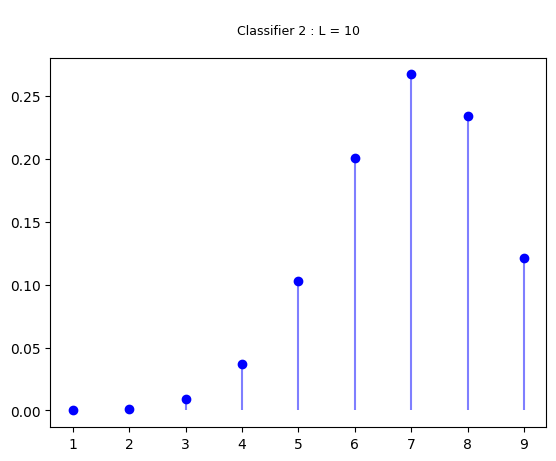

In [18]:
# prompt: utilise la binom cdf et applique 1 - résultat au lieu de sum_probability = np.sum(binom.pmf(x[x >= L/2], L, p)) if L > 1 else np.sum(binom.pmf(x, L, p))

from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

p = 0.7
L = 10
rv = binom(L, p)

list_L = [1, 5, 10, 50, 100]

for i, L in enumerate(list_L):

    x = np.arange(binom.ppf(0.0001,L,p),
                  binom.ppf(1, L, p))
    if L == 10:
      fig, ax = plt.subplots(1, 1)
      ax.plot(x, binom.pmf(x, L, p), 'bo', label='binom pmf')
      ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', alpha=0.5)
      plt.title(f"\nClassifier {i} : L = {L}\n", fontsize=9)

    # Calculate the sum of the mass function for x > L/2 using binom.cdf
    sum_probability = 1 - binom.cdf(int(L/2), L, p)
    print(f"Pour L = {L}, la probabilité de prédiction correcte pour un nombre de classifieur > L/2 est : {sum_probability}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

biais revient à overfitting içi

augmenter le bruit revient à augmenter le coefficient multiplicatif y[::5] += 1 *(0.5 -rng.rand(16))

sous échantillonner = reprendre moins de valeurs du dataset de base

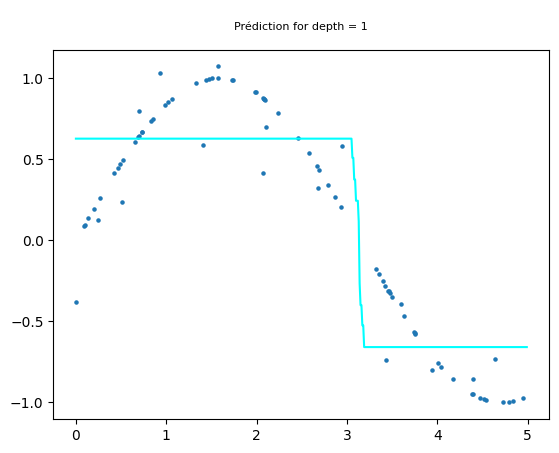

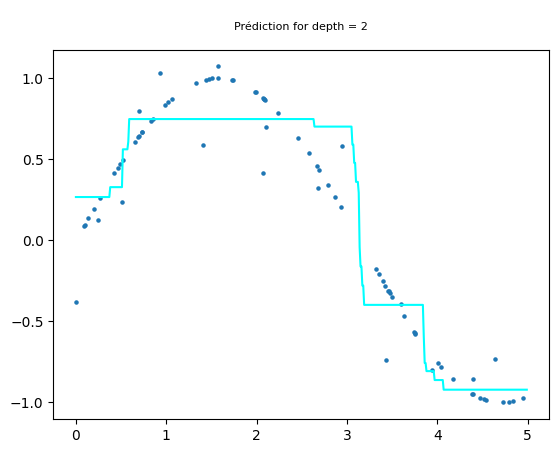

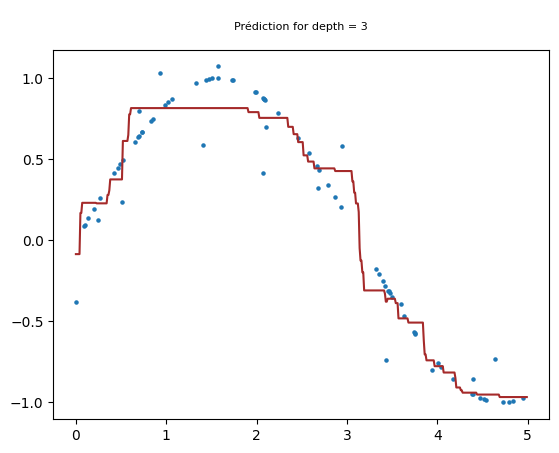

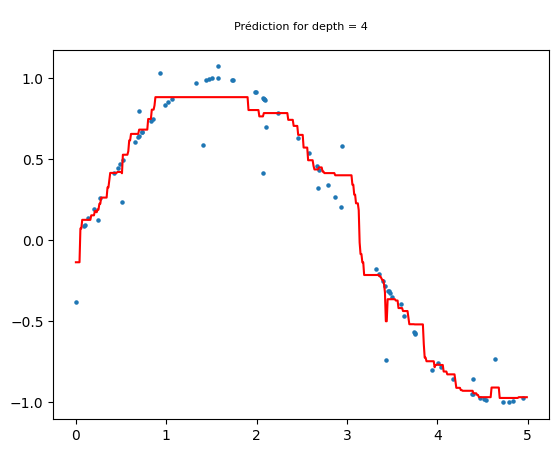

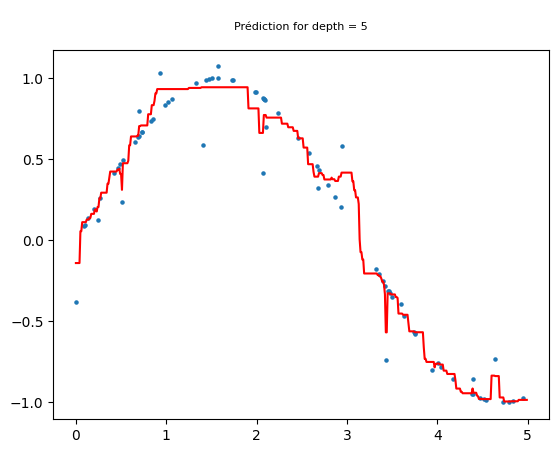

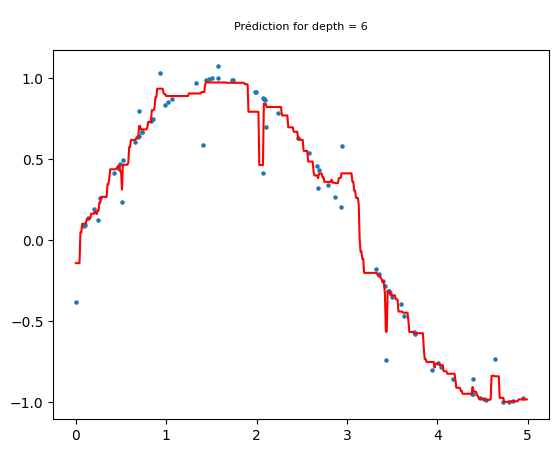

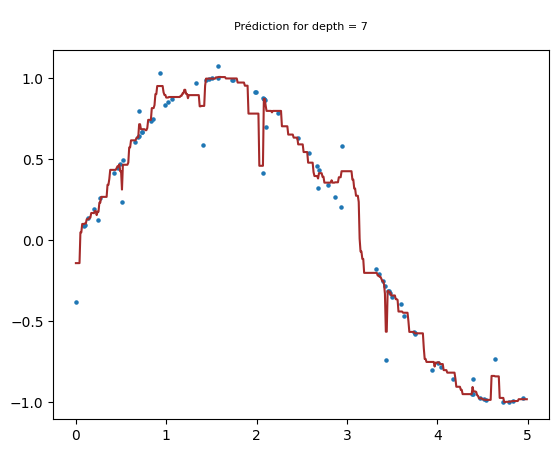

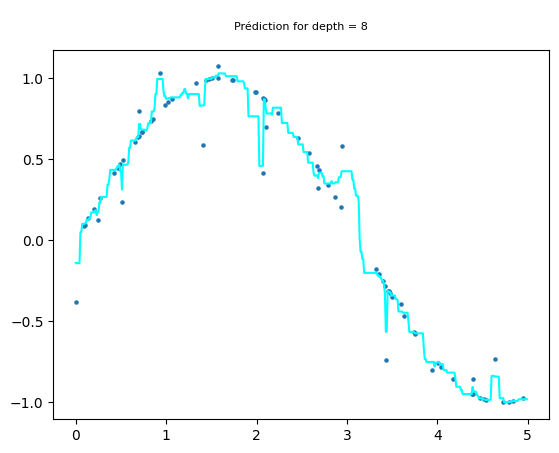

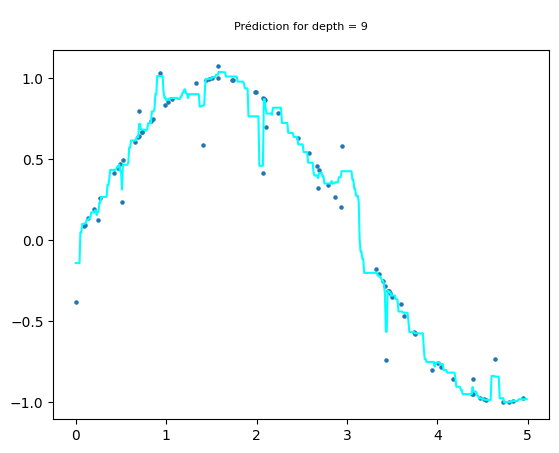

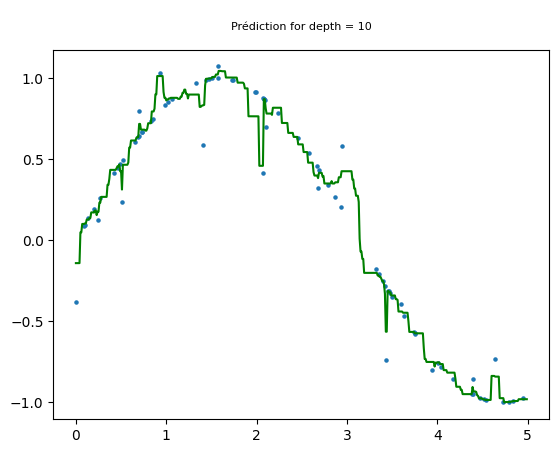

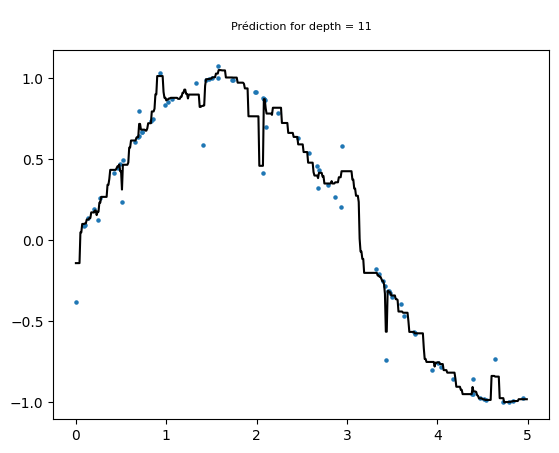

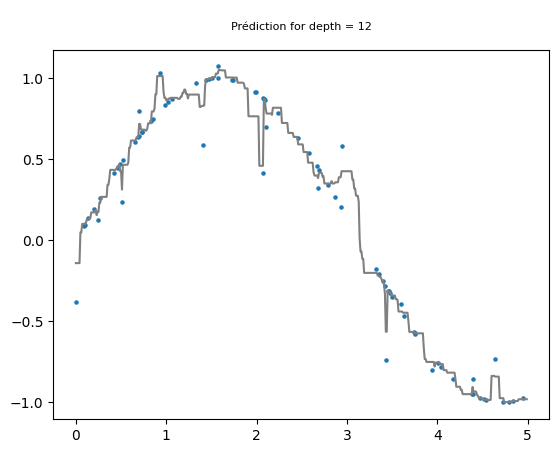

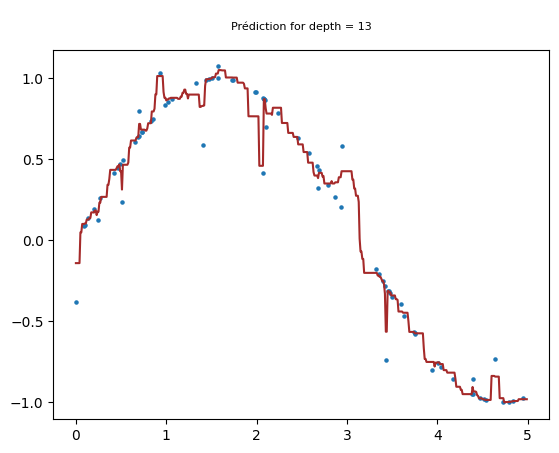

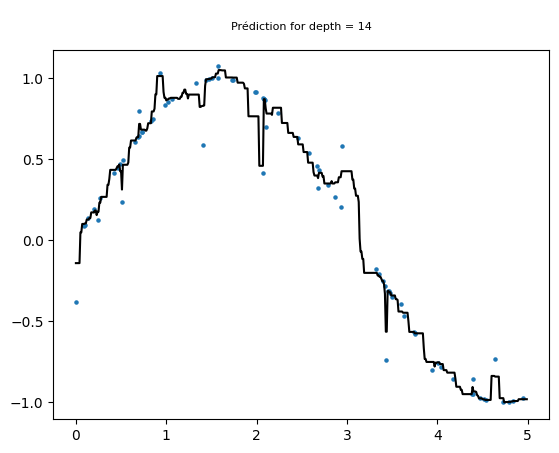

In [ ]:
depths = np.arange(1,15)

colors = ['blue','red','green','black','gray','cyan','brown']

for i,depth in enumerate(depths):
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,random_state=1,bootstrap=True)
  # fit the regressor with X and Y data
  bagging.fit(X, y)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,bagging.predict(X_test),color=np.random.choice(colors))
  plt.title(f'\nPrédiction for depth = {depth}\n',fontsize=8)



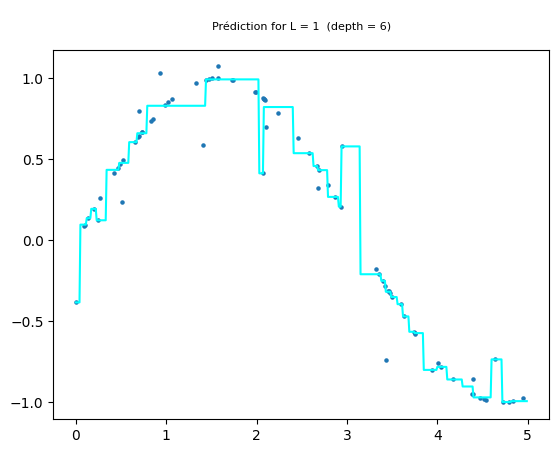

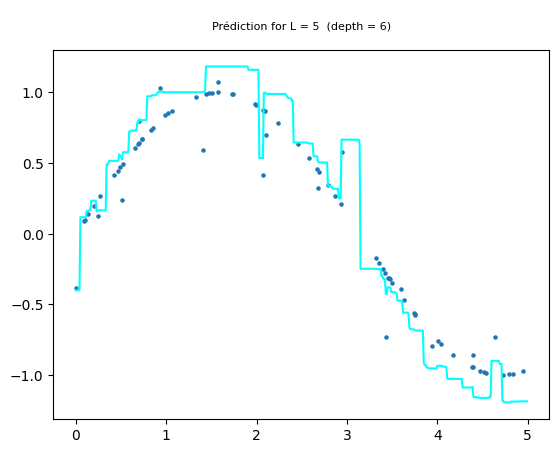

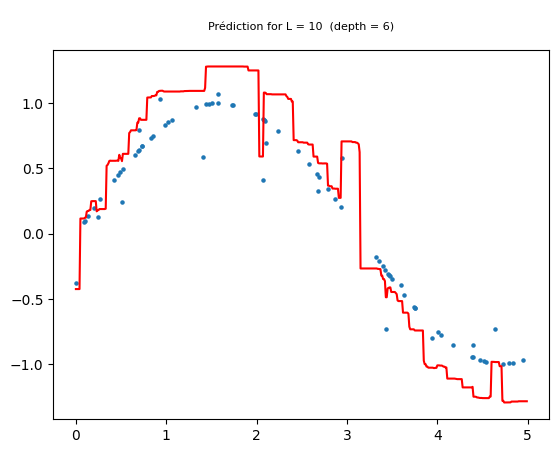

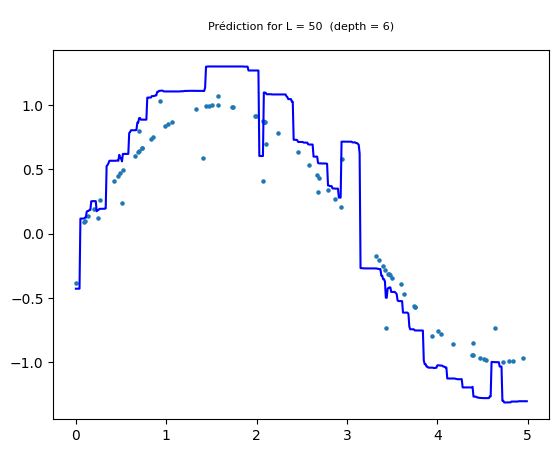

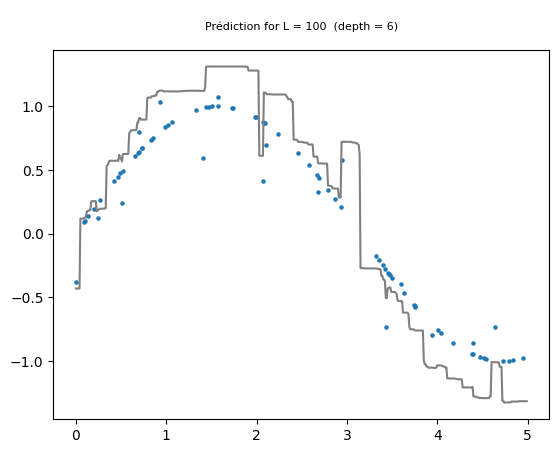

In [ ]:
depth = 6
predictions = []
for i,L in enumerate(list_L):
  w = 1/L
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,n_estimators=L,bootstrap=True)

  bagging.fit(X, y)

  # Prédiction sur l'ensemble de test
  y_pred = bagging.predict(X_test)
  predictions.append(w*y_pred)

  aggregated = np.sum(predictions,axis=0)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,aggregated,color=np.random.choice(colors))
  plt.title(f'\nPrédiction for L = {L}  (depth = {depth})\n',fontsize=8)



In [ ]:
# prompt: Le nombre de classifieurs influe sur quoi au niveau du modèle ?

# Le nombre de classifieurs (L dans le code) influe sur la variance et le biais du modèle.

# Variance : Avec un nombre plus élevé de classifieurs, la variance du modèle diminue.
#  Chaque classifieur est entraîné sur un sous-ensemble différent des données
#  (bootstrap), et leur agrégation (somme pondérée dans le code) permet de réduire
#  l'impact des erreurs individuelles.  Autrement dit, la prédiction finale est plus stable.

# Biais : L'influence du nombre de classifieurs sur le biais est moins directe.
# Un nombre faible de classifieurs peut conduire à un biais plus élevé car le modèle
# est moins complexe et moins capable de capturer les relations complexes entre les variables.
# Cependant, un nombre excessif de classifieurs peut aussi conduire à un léger sur-apprentissage,
# augmentant légèrement le biais (mais ce n'est pas aussi marqué que l'effet de la variance).
# Dans l'ensemble, pour le bagging, un nombre plus important de classifieurs tend vers une meilleure généralisation.


# En résumé :
# - Plus de classifieurs : Diminution de la variance, impact moins clair sur le biais.
# - Moins de classifieurs : Augmentation potentielle du biais, plus grande variance.

En résumé, un bon modèle de Bagging doit avoir une faible variance et un bon compromis entre biais et variance, avec une performance robuste sur de nouvelles données.

Voici un exemple de surapprentissage ci dessous en jouant sur le bruit

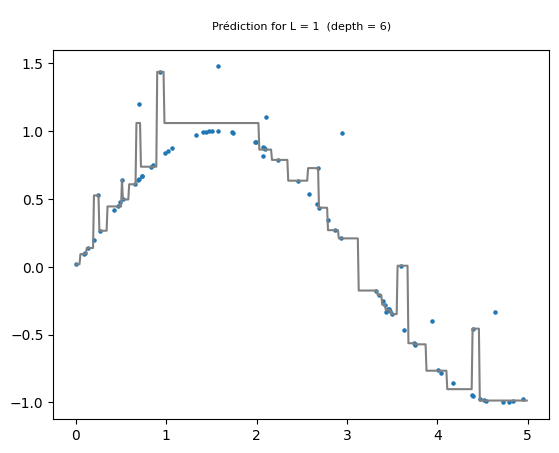


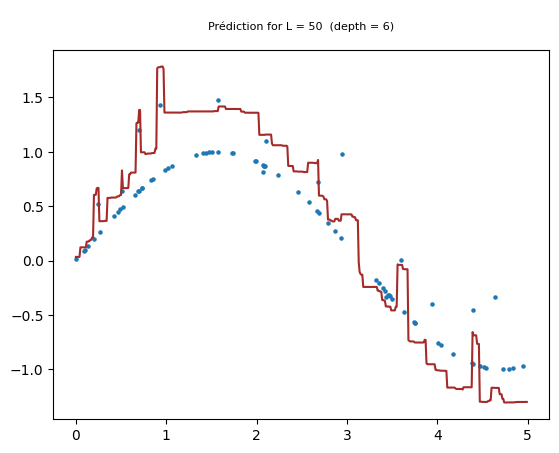

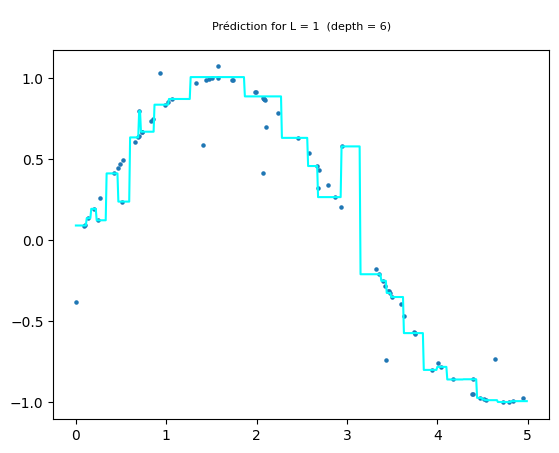

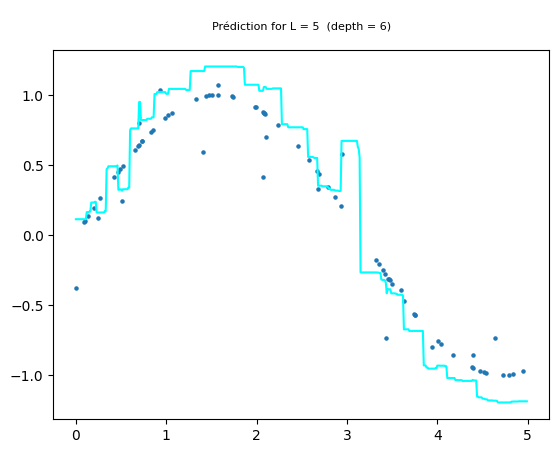

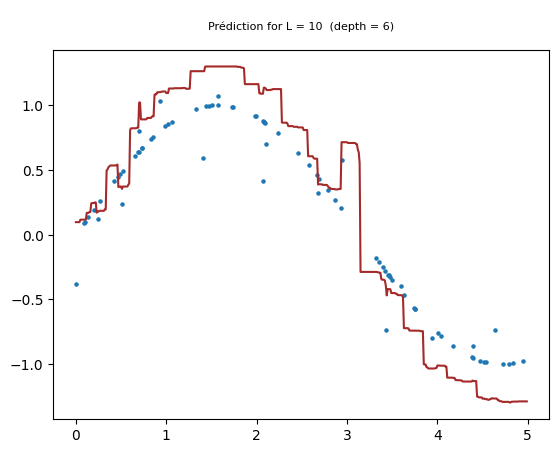

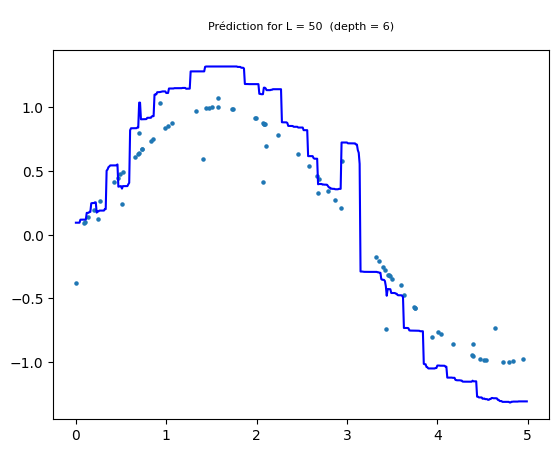

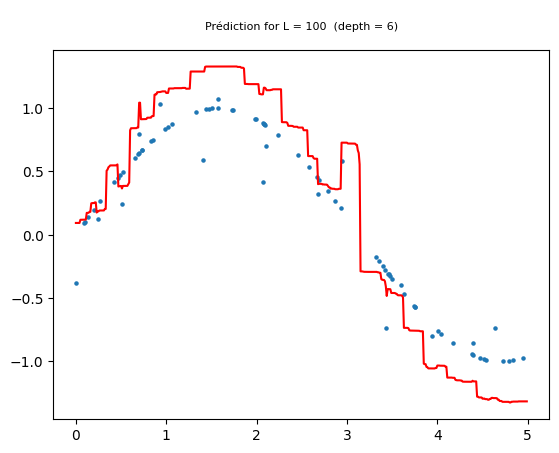

In [ ]:
depth = 6
predictions = []

for i,L in enumerate(list_L):
  w = 1/L
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,n_estimators=L,bootstrap=False,max_samples=0.5)

  bagging.fit(X, y)

  # Prédiction sur l'ensemble de test
  y_pred = bagging.predict(X_test)
  predictions.append(w*y_pred)

  aggregated = np.sum(predictions,axis=0)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,aggregated,color=np.random.choice(colors))
  plt.title(f'\nPrédiction for L = {L}  (depth = {depth})\n',fontsize=8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# Charger les datasets
diabetes = datasets.load_diabetes()
iris = datasets.load_iris()
digits = datasets.load_digits()

In [21]:
# Fonction pour évaluer un modèle avec 7-fold cross-validation
def evaluate_model(model, X, y):
    return cross_val_score(model, X, y, cv=7, scoring='accuracy' if model.__class__ == RandomForestClassifier or model.__class__ == SVC else 'neg_mean_squared_error').mean()

# Datasets et modèles à tester
datasets_list = [
    (diabetes.data, diabetes.target, RandomForestRegressor(), 'Diabetes (RandomForest)'),
    (iris.data, iris.target, RandomForestClassifier(), 'Iris (RandomForest)'),
    (digits.data, digits.target, RandomForestClassifier(), 'Digits (RandomForest)')
]

svm_results = []

# Évaluation des Random Forests et SVM
for X, y, model, name in datasets_list:
    # Évaluer Random Forest
    rf_score = evaluate_model(model, X, y)
    if model.__class__ in (RandomForestClassifier,SVC):
      print(f'{name} - Random Forest Score: {rf_score}')
    else:
      print(f'{name} - Random Forest Mean Squared Error : {rf_score}')

    # Pour les datasets de classification, évaluer un SVM linéaire
    if model.__class__ == RandomForestClassifier:
        svm = SVC(kernel='linear')
        svm_score = evaluate_model(svm, X, y)
        print(f'{name} - SVM (linear) Score: {svm_score}')
        svm_results.append((name, rf_score, svm_score))

    # Pour les datasets de régression, évaluer un SVM linéaire avec SVR (Support Vector Regression)
    else:
        from sklearn.svm import SVR
        svm_regressor = SVR(kernel='linear')
        svm_score = evaluate_model(svm_regressor, X, y)
        print(f'{name} - SVM (linear) Regression Mean Squared Error : {-svm_score}')  # Le score est négatif pour la régression

Diabetes (RandomForest) - Random Forest Mean Squared Error : -3430.6153543048467
Diabetes (RandomForest) - SVM (linear) Regression Mean Squared Error : 5962.592224820642
Iris (RandomForest) - Random Forest Score: 0.9397031539888683
Iris (RandomForest) - SVM (linear) Score: 0.9734075448361164
Digits (RandomForest) - Random Forest Score: 0.9348726723179545
Digits (RandomForest) - SVM (linear) Score: 0.9499157518065592


In [ ]:
# prompt: analyse ces résultats en expliquant les raisons en francais
# Diabetes (RandomForest) - Random Forest Mean Squared Error : -3430.6153543048467
# Diabetes (RandomForest) - SVM (linear) Regression Mean Squared Error : 5962.592224820642
# Iris (RandomForest) - Random Forest Score: 0.9397031539888683
# Iris (RandomForest) - SVM (linear) Score: 0.9734075448361164
# Digits (RandomForest) - Random Forest Score: 0.9348726723179545
# Digits (RandomForest) - SVM (linear) Score: 0.9499157518065592

Les résultats montrent des performances variables des forêts aléatoires et des SVM linéaires sur trois ensembles de données différents : Diabetes, Iris et Digits.

**Diabetes:**

* **Forêt aléatoire:**  Un MSE (Mean Squared Error) négatif (-3430.62) est inhabituel et suggère une erreur dans le calcul ou l'interprétation du score.  Le MSE doit être positif.  Il est possible qu'il y ait une erreur dans le code d'évaluation, peut-être une mauvaise utilisation de `neg_mean_squared_error` ou une conversion incorrecte des résultats.  Une valeur négative n'a pas de signification concrète dans ce contexte.
* **SVM linéaire:** Un MSE de 5962.59 indique que le modèle SVM linéaire a des erreurs de prédiction plus élevées (en moyenne) que le modèle de forêt aléatoire, même en tenant compte de la particularité du MSE négatif de la forêt aléatoire.


**Iris et Digits:**

* **Forêt aléatoire et SVM linéaire:** Sur ces ensembles de données de classification, les deux modèles obtiennent de bons scores (au dessus de 0.9). Le SVM linéaire a légèrement surpassé la forêt aléatoire sur les deux ensembles de données (Iris : 0.97 contre 0.94 ; Digits : 0.95 contre 0.93).
* **Interprétation:**  Sur ces deux ensembles de données, la séparation entre les classes est probablement relativement linéaire, ce qui explique la bonne performance du SVM linéaire. La forêt aléatoire, bien qu'elle soit plus flexible, peut être légèrement moins performante lorsque la relation entre les caractéristiques et les classes est principalement linéaire.  Les résultats suggèrent que, dans ces cas précis, la simplicité du SVM linéaire est suffisante et offre des performances comparables ou meilleures.

**En résumé:**

* Il y a une anomalie dans l'évaluation de la forêt aléatoire sur l'ensemble de données Diabetes (le MSE négatif).  Il est crucial de corriger ce problème pour avoir une analyse pertinente.
* Sur les ensembles de données de classification (Iris et Digits), le SVM linéaire semble être légèrement plus performant.
* La performance du modèle dépend fortement de la nature des données. Pour les ensembles de données non-linéaires, une forêt aléatoire pourrait potentiellement obtenir de meilleurs résultats qu'un SVM linéaire.


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


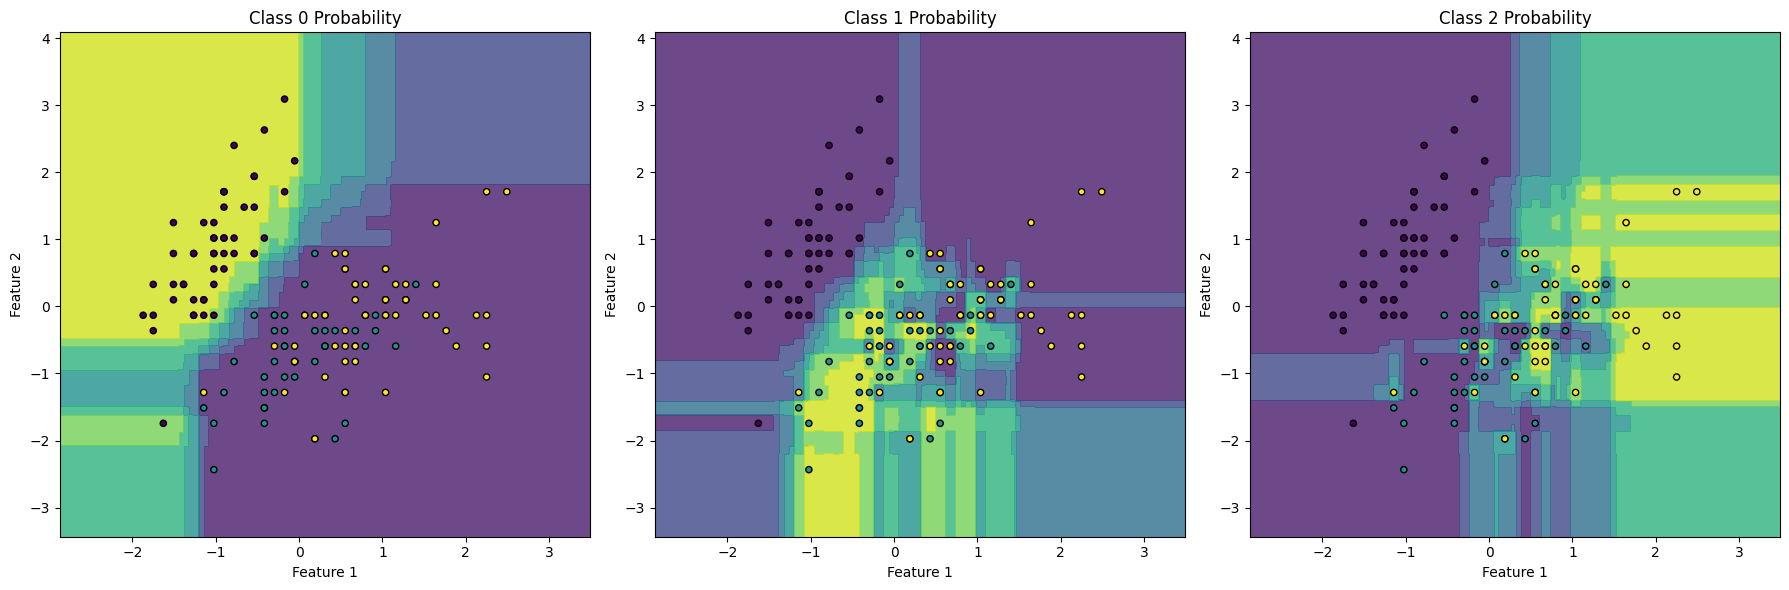

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Charger le dataset iris
iris = load_iris()

print(iris.feature_names)
X_unscaled, y = iris.data[:, :2], iris.target  # Prendre les 2 premières variables explicatives

# Standardiser les données
X = preprocessing.scale(X_unscaled)

# Initialiser et entraîner un RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Création d'un maillage de points pour visualiser les probabilités
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prédictions des probabilités sur tout le maillage
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Redimensionner la sortie pour correspondre au maillage
Z = Z.reshape(xx.shape[0], xx.shape[1], -1)

# Tracer la probabilité de chaque classe
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    ax.contourf(xx, yy, Z[:, :, i], alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    ax.set_title(f'Class {i} Probability')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

#prendre échelle de couleurs différentes

In [ ]:
import sys

On observe que la précision augmente lorsque la profondeur augmente tandis que l'écart-type tend à diminuer

AdaBoost avec profondeur 1: Précision moyenne (6-fold CV) = 0.6667, Ecart-type = 0.0459
AdaBoost avec profondeur 2: Précision moyenne (6-fold CV) = 0.8231, Ecart-type = 0.0313
AdaBoost avec profondeur 10: Précision moyenne (6-fold CV) = 0.9594, Ecart-type = 0.0159


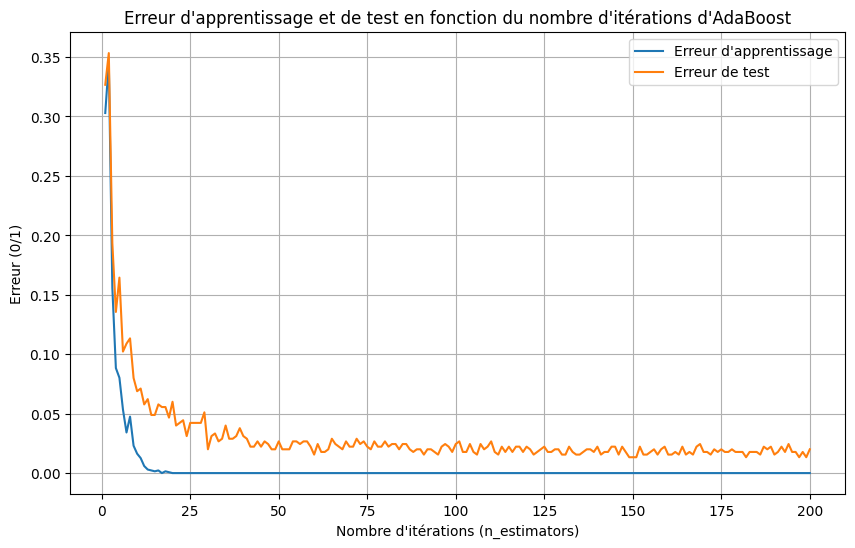


Remarques:
On observe généralement que l'erreur d'apprentissage diminue avec le nombre d'itérations, tandis que l'erreur de test peut d'abord diminuer puis augmenter. Cela suggère qu'AdaBoost peut sur-apprendre si le nombre d'itérations est trop élevé. Une profondeur d'arbre trop grande peut également favoriser le sur-apprentissage.
Pour un nombre d'estimateurs assez grand (n>10) : l'erreur d'apprentissage est très négligeable par rapport à l'erreur de test
Avec une grande profondeur d'arbres de décision, AdaBoost est plus susceptible de sur-apprendre les données d'entraînement, conduisant à une faible erreur d'entraînement mais à une erreur de test élevée.


In [20]:
# prompt: 14) Mettre en œuvre AdaBoost avec des arbres de profondeur 1, puis 2, puis 10, sur le jeu de données
# digits. On calculera notamment la précision obtenue par 6-fold cross-validation. On pourra utiliser
# par exemple
# from sklearn.ensemble import AdaBoostClassifier
# 15) Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%)
# et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations.
# 16) Que remarquez vous ? Que se passe-t-il si la profondeur des arbres de classification est grande ?
# 17) (Question optionnelle) : Implémenter vous-même l’algorithme AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Charger le dataset digits
digits = datasets.load_digits()
X, y = digits.data, digits.target

# 14) AdaBoost avec différentes profondeurs d'arbres et cross-validation
depths = [1, 2, 10]
for depth in depths:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=50) #ajustement du nombre d'estimateurs
    scores = cross_val_score(ada, X, y, cv=6, scoring='accuracy')
    print(f"AdaBoost avec profondeur {depth}: Précision moyenne (6-fold CV) = {scores.mean():.4f}, Ecart-type = {scores.std():.4f}")


# 15) AdaBoost sur échantillons d'apprentissage et de test, et tracé des erreurs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)) # Utilisation de SAMME pour la classification
train_errors = []
test_errors = []

for n_estimators in range(1, 201): # Augmentation du nombre d'itérations
    ada.n_estimators = n_estimators
    ada.fit(X_train, y_train)

    train_errors.append(1 - ada.score(X_train, y_train))
    test_errors.append(1 - ada.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), train_errors, label='Erreur d\'apprentissage')
plt.plot(range(1, 201), test_errors, label='Erreur de test')
plt.xlabel('Nombre d\'itérations (n_estimators)')
plt.ylabel('Erreur (0/1)')
plt.title("Erreur d'apprentissage et de test en fonction du nombre d'itérations d'AdaBoost")
plt.legend()
plt.grid(True)
plt.show()


# 16) Remarques
print("\nRemarques:")
print("On observe généralement que l'erreur d'apprentissage diminue avec le nombre d'itérations, tandis que l'erreur de test peut d'abord diminuer puis augmenter. Cela suggère qu'AdaBoost peut sur-apprendre si le nombre d'itérations est trop élevé. Une profondeur d'arbre trop grande peut également favoriser le sur-apprentissage.")
print("Pour un nombre d'estimateurs assez grand (n>10) : l'erreur d'apprentissage est très négligeable par rapport à l'erreur de test")
print("Avec une grande profondeur d'arbres de décision, AdaBoost est plus susceptible de sur-apprendre les données d'entraînement, conduisant à une faible erreur d'entraînement mais à une erreur de test élevée.")


On observe que la précision augmente et que l'écart-type diminue pour une profondeur de plus en plus grande